In [171]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import glob
from os import mkdir


In [173]:
from genericpath import exists


if not exists("./output/"):
    mkdir("./output")
user_query_zipcode = "97318"

In [ ]:
all_price_files = []
for price_file in glob.glob("./prices/*-prices.csv"):
    all_price_files.append(pd.read_csv(price_file))


prices = pd.concat(all_price_files)
stations = pd.read_csv("./stations/2022-09-08-stations.csv")
stations.head()

prices_stations_combined = pd.merge(prices, stations, left_on="station_uuid", right_on="uuid", how="inner")

In [ ]:
prices_stations_combined.head()
prices_stations_cleaned = prices_stations_combined.copy()
prices_stations_cleaned.dropna(inplace=True)

In [ ]:
prices_stations_cleaned = prices_stations_cleaned[(prices_stations_cleaned.e5 > 0)]
prices_stations_cleaned.date = prices_stations_cleaned.date.str.replace("\+\d{2}", "", regex=True)
prices_stations_cleaned[["date", "time"]] = prices_stations_cleaned.date.str.split(" ", expand=True)

In [ ]:
prices_stations_cleaned.date = pd.to_datetime(prices_stations_cleaned.date)

In [ ]:
prices_stations_user_query = prices_stations_cleaned.copy()
prices_stations_user_query = prices_stations_user_query[(prices_stations_user_query.post_code == user_query_zipcode)]
prices_stations_users_query = prices_stations_user_query.sort_values(by="date")

In [177]:
summary_statistic_e5_e10 = pd.DataFrame(prices_stations_user_query[["e5", "e10"]].describe())

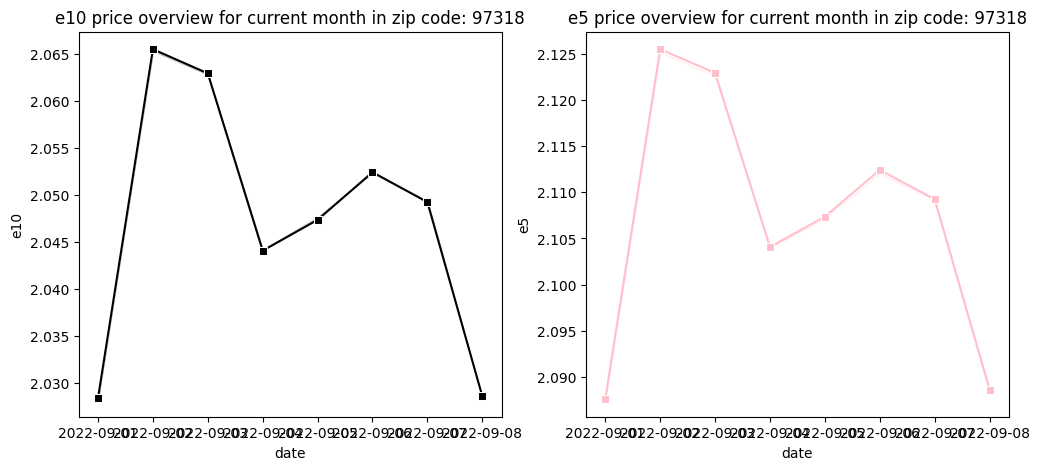

<Figure size 640x480 with 0 Axes>

In [174]:
figure = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("e10 price overview for current month in zip code: {}".format(user_query_zipcode))
ax = sns.lineplot(prices_stations_user_query, x="date", y="e10", marker="s", color="black", errorbar=('ci', False))
plt.subplot(1,2,2)
plt.title("e5 price overview for current month in zip code: {}".format(user_query_zipcode))
ax = sns.lineplot(prices_stations_user_query, x="date", y="e5", marker="s", color="pink", errorbar=('ci', False))
plt.show()
plt.savefig("./output/timeline.png")


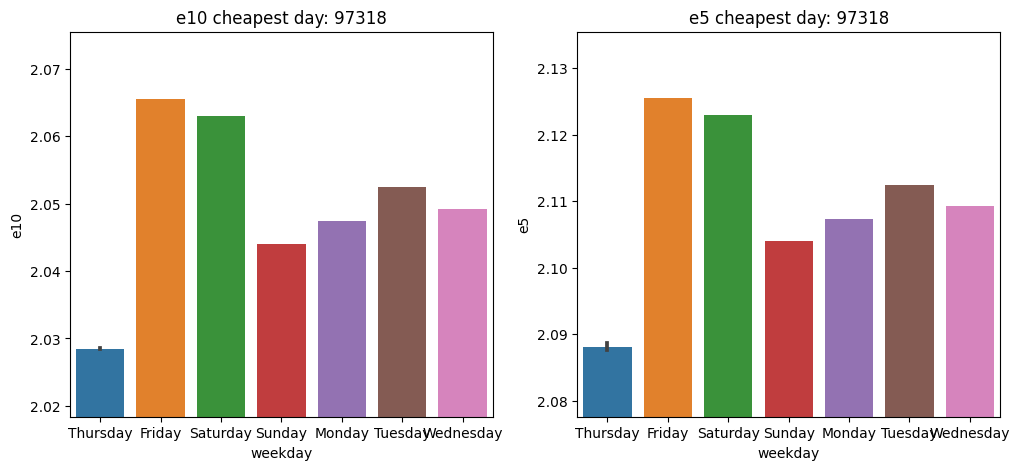

<Figure size 640x480 with 0 Axes>

In [176]:
cheapest_day_e10 = prices_stations_user_query.groupby(by="date").e10.mean().reset_index()
cheapest_day_e10.sort_values(by="e10")

cheapest_day_e5 = prices_stations_user_query.groupby(by="date").e5.mean().reset_index()
cheapest_day_e5.sort_values(by="e5")

cheapest_day_e10["weekday"] = cheapest_day.date.dt.day_name()
cheapest_day_e5["weekday"] = cheapest_day.date.dt.day_name()


figure = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("e10 cheapest day: {}".format(user_query_zipcode))
ax = sns.barplot(cheapest_day_e10, x="weekday", y="e10")
plt.ylim([min(cheapest_day_e10.e10) - 0.01, max(cheapest_day_e10.e10) + 0.01])
plt.subplot(1,2,2)
plt.title("e5 cheapest day: {}".format(user_query_zipcode))
ax = sns.barplot(cheapest_day_e5, x="weekday", y="e5")
plt.ylim([min(cheapest_day_e5.e5) - 0.01, max(cheapest_day_e5.e5) + 0.01])
plt.show()
plt.savefig("./output/cheapest_day.png")